In [944]:
import Quandl
import numpy as np
from scipy import stats
import statsmodels
import statsmodels.api as sm
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [945]:
QUANDL_API_KEY = 'MNJzKfdjWBuixA5t61h1'

def get_quandl_data(code):
    return Quandl.get(code, authtoken=QUANDL_API_KEY)

- natural resources (WWDI/USA_NY_GDP_TOTL_RT_ZS - 1970)
- immigration
- unemployment (FRED/UNRATE - 1948)
- regulations (WWGI/USA_RQ_EST - 1996)
- cpi (WORLDBANK/USA_FP_CPI_TOTL_ZG - 1961)
- R&D INVESTMENT (NSF/IND_R_D - 1953)

- education (college graduates? literacy? graduation rate?)

- researchers (WWDI/USA_SP_POP_SCIE_RD_P6 - 1996)
- doctorate recepients (NSF/DOCTORATES - 1957)
- doctorate granting instiutions (NSF/DOC_INST - 1970)
- venture capital deals(NVCA/VENTURE_3_11 - 1985)

In [946]:
patents = get_quandl_data("USPTO/PAT_ACT")
patents = patents['Utility Patents']

In [947]:
patents.head()

Year
1790-12-31     3.0
1791-12-31    33.0
1792-12-31    11.0
1793-12-31    20.0
1794-12-31    22.0
Name: Utility Patents, dtype: float64

### [Natural Resources as a percentage of GDP](https://www.quandl.com/data/WWDI/USA_NY_GDP_TOTL_RT_ZS-Total-natural-resources-rents-of-GDP-United-States)

In [948]:
natural_resources = get_quandl_data("WWDI/USA_NY_GDP_TOTL_RT_ZS")
natural_resources = natural_resources['Value']
natural_resources.name = 'Natural Resources'
natural_resources /= 100

In [949]:
natural_resources.head()

Date
1970-12-31    0.010006
1971-12-31    0.010355
1972-12-31    0.009789
1973-12-31    0.012949
1974-12-31    0.035525
Name: Natural Resources, dtype: float64

### [R&D Investment](https://www.quandl.com/data/NSF/IND_R_D-Industrial-R-D-Performed-in-the-United-States-by-Source-of-Funds)

In [950]:
rd_investment = get_quandl_data("NSF/IND_R_D")
rd_investment = rd_investment['All Sources (Constant $)']
rd_investment.name = 'R&D Investment'
rd_investment *= 1000000

In [951]:
rd_investment.head()

Year
1953-12-31    1.990100e+10
1954-12-31    2.209600e+10
1955-12-31    2.474700e+10
1956-12-31    3.406400e+10
1957-12-31    3.857800e+10
Name: R&D Investment, dtype: float64

### [Number of Doctorates](https://www.quandl.com/data/NSF/DOCTORATES--Doctorate-Recipients-from-U-S-Colleges-and-Universities)

In [952]:
doctorates = get_quandl_data("NSF/DOCTORATES")
doctorates = doctorates['Number']
doctorates.name = '# of Doctorates'
doctorates = doctorates.shift(-1, freq='D')

In [953]:
doctorates.head()

Year
1956-12-31     8611.0
1957-12-31     8773.0
1958-12-31     9213.0
1959-12-31     9733.0
1960-12-31    10413.0
Freq: A-DEC, Name: # of Doctorates, dtype: float64

### [Number of Venture Capital Deals](https://www.quandl.com/data/NVCA/VENTURE_3_11-Venture-Capital-Investments-By-State-Number-of-Deals)

In [954]:
venture_capital = get_quandl_data("NVCA/VENTURE_3_11")
venture_capital = venture_capital['Total']
venture_capital.name = '# of VC Deals'

In [955]:
venture_capital.head()

Year
1985-12-31    1345.0
1986-12-31    1421.0
1987-12-31    1646.0
1988-12-31    1526.0
1989-12-31    1544.0
Name: # of VC Deals, dtype: float64

### [Unemployment Rate](https://www.quandl.com/data/FRED/UNRATE-Civilian-Unemployment-Rate)

In [956]:
unemployment = get_quandl_data("FRED/UNRATE")['VALUE']
unemployment = unemployment.shift(-1, freq='D')
unemployment = unemployment.resample('A').first()
unemployment.name = "Unemployment rate (%)"
unemployment /= 100

In [957]:
unemployment.head()

DATE
1947-12-31    0.034
1948-12-31    0.038
1949-12-31    0.047
1950-12-31    0.064
1951-12-31    0.034
Freq: A-DEC, Name: Unemployment rate (%), dtype: float64

### [Immigration](http://www.migrationpolicy.org/programs/data-hub/charts/immigrant-population-over-time?width=1000&height=850&iframe=true)

In [958]:
immigration = pd.read_csv('us_immigration.csv',
                          index_col='Year',
                          thousands=',', parse_dates=True)['Number of Legal Permanent Residents']
immigration.name = 'New Legal Permanent Residents'
immigration = immigration.shift(-1, freq='D')

In [959]:
immigration.head()

Year
1819-12-31    8385
1820-12-31    9127
1821-12-31    6911
1822-12-31    6354
1823-12-31    7912
Freq: A-DEC, Name: New Legal Permanent Residents, dtype: int64

### [Inflation](https://www.quandl.com/data/WORLDBANK/USA_FP_CPI_TOTL_ZG-United-States-Inflation-consumer-prices-annual)

In [960]:
cpi = get_quandl_data('WORLDBANK/USA_FP_CPI_TOTL_ZG')['Value']
cpi.name = 'CPI'

In [961]:
cpi.head()

Date
1961-12-31    1.075182
1962-12-31    1.116071
1963-12-31    1.214128
1964-12-31    1.308615
1965-12-31    1.668461
Name: CPI, dtype: float64

### [Post-secondary school enrollment](https://www.quandl.com/data/WORLDBANK/USA_SE_TER_ENRR-United-States-School-enrollment-tertiary-gross)

In [962]:
tertiary_education_enrollment = get_quandl_data("WORLDBANK/USA_SE_TER_ENRR")['Value']
tertiary_education_enrollment.name = 'Post-secondary school enrollment (%)'
tertiary_education_enrollment /= 100

In [963]:
tertiary_education_enrollment.head()

Date
1971-12-31    0.470459
1972-12-31    0.479784
1973-12-31    0.485346
1974-12-31    0.489661
1975-12-31    0.510441
Name: Post-secondary school enrollment (%), dtype: float64

### [# of IPOs](https://www.quandl.com/data/RITTER/US_IPO_STATS-Historical-US-IPO-Statistics)

In [964]:
ipos = get_quandl_data("RITTER/US_IPO_STATS")['Net Number of IPOs']
ipos.name = "# of IPOs"
ipos = ipos.resample('A').sum()

In [965]:
ipos.head()

Date
1960-12-31   NaN
1961-12-31   NaN
1962-12-31   NaN
1963-12-31   NaN
1964-12-31   NaN
Freq: A-DEC, Name: # of IPOs, dtype: float64

In [966]:
list_of_factors = [
#     natural_resources,
    rd_investment,
    doctorates,
#     venture_capital,
#     unemployment,
#     immigration,
#     cpi,
    tertiary_education_enrollment,
    ipos
]

In [967]:
factors = pd.concat(list_of_factors, 1)

In [968]:
factors.head()

,R&D Investment,# of Doctorates,Post-secondary school enrollment (%),# of IPOs
1953-12-31,1.990100e+10,NaN,NaN,NaN
1954-12-31,2.209600e+10,NaN,NaN,NaN
1955-12-31,2.474700e+10,NaN,NaN,NaN
1956-12-31,3.406400e+10,8611.0,NaN,NaN
1957-12-31,3.857800e+10,8773.0,NaN,NaN


In [969]:
joined = pd.concat([patents, factors], 1)
joined = joined.dropna()

In [970]:
patents = joined.pop('Utility Patents')
factors = joined

In [971]:
patents.head()

1975-12-31    72000.0
1976-12-31    70226.0
1977-12-31    65269.0
1978-12-31    66102.0
1979-12-31    48854.0
Name: Utility Patents, dtype: float64

In [972]:
factors.head()

,R&D Investment,# of Doctorates,Post-secondary school enrollment (%),# of IPOs
1975-12-31,6.365000e+10,32946.0,0.510441,11.0
1976-12-31,6.715700e+10,31716.0,0.547315,25.0
1977-12-31,6.976600e+10,30875.0,0.528749,14.0
1978-12-31,7.278000e+10,31238.0,0.532967,18.0
1979-12-31,7.714600e+10,31019.0,0.524995,36.0


# Visualise Data

/usr/local/lib/python3.4/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


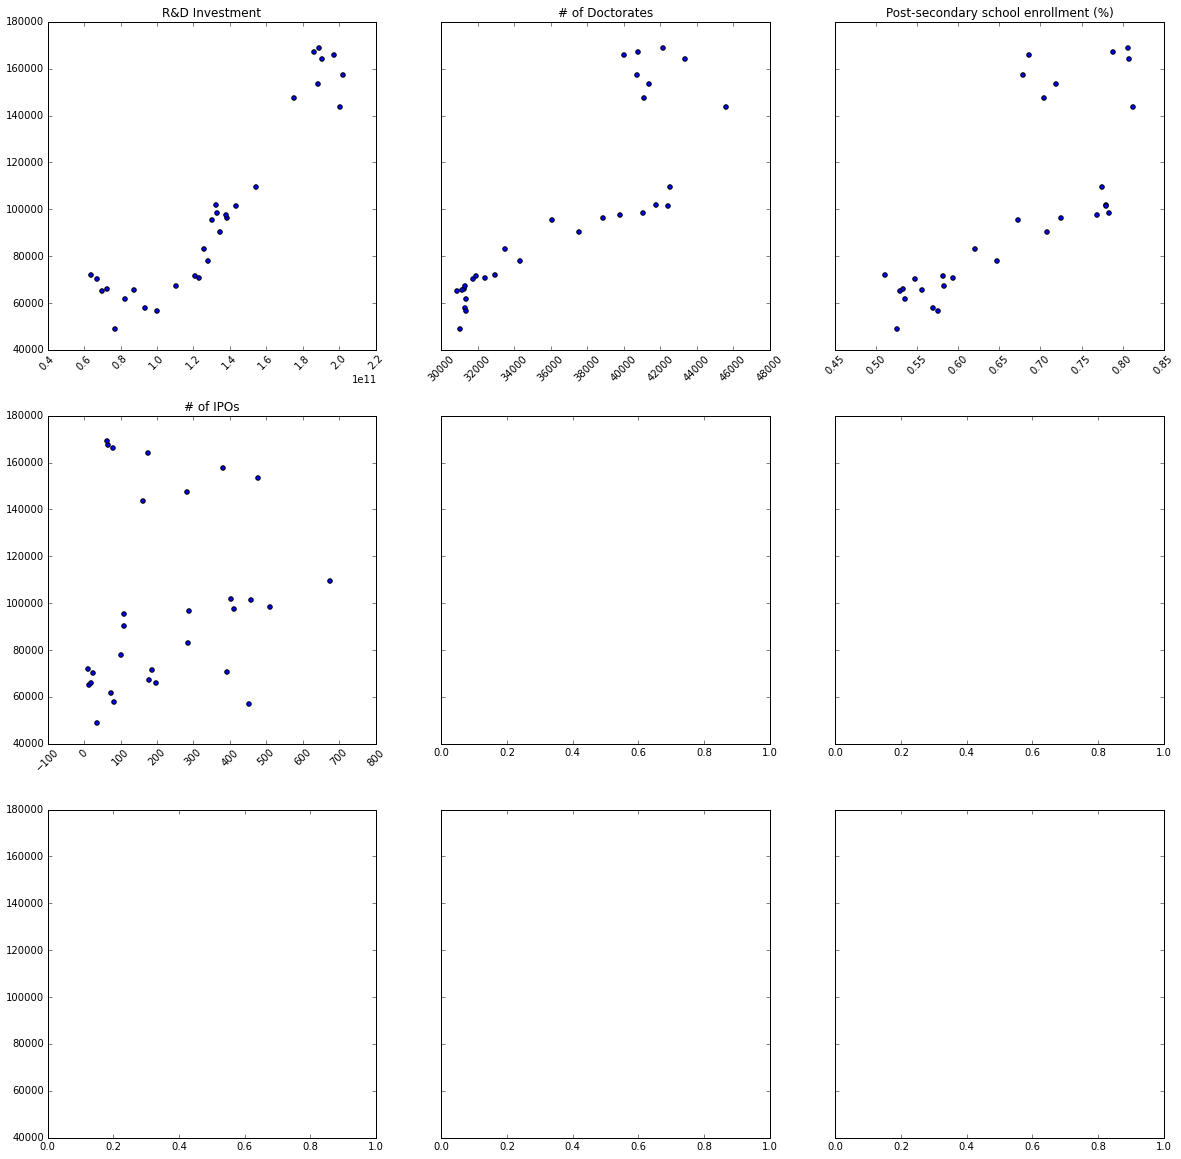

In [973]:
f, axes = plt.subplots(3, 3, sharey=True, figsize=(20,20))
for factor, ax in zip(factors, axes.ravel()):
    ax.scatter(factors[factor], patents);
    ax.set_title(factor)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

# Model

### Train-Test Split

In [974]:
X_train, X_test, y_train, y_test = train_test_split(factors, patents, test_size=0.20)

### Train model

In [975]:
model_factors = sm.add_constant(X_train)
model = sm.OLS(y_train, model_factors)
results = model.fit()

In [976]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Utility Patents   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     103.5
Date:                Sun, 04 Dec 2016   Prob (F-statistic):           1.27e-12
Time:                        02:45:01   Log-Likelihood:                -251.03
No. Observations:                  24   AIC:                             512.1
Df Residuals:                      19   BIC:                             517.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------------------
const                                -1.045e+05   2.36e+04     -4.426      0.000     -1.54e+05 -5.51e+04
R&D Investment                        6.124e-07   9.38e-08      6.527      0.000      4.16e-07  8.09e-07
# of Doctorates                          6.3808      1.468      4.348      0.000         3.309     9.452
Post-secondary school enrollment (%) -1.445e+05   5.92e+04     -2.441      0.025     -2.68e+05 -2.06e+04
# of IPOs                              -56.9334     11.978     -4.753      0.000       -82.003   -31.864
==============================================================================
Omnibus:                        1.056   Durbin-Watson:                   1.233
Prob(Omnibus):                  0.590   Jarque-Bera (JB):                0.811
Skew:                          -0.429   Prob(JB):                        0.667
Kurtosis:                       2.727   Cond. No.                     4.11e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.11e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Test model out of sample

In [977]:
model_test_factors = sm.add_constant(X_test)
oos_predictions = results.predict(model_test_factors)

In [978]:
r2_score(y_test, oos_predictions)

0.60391365776615991